<a href="https://colab.research.google.com/github/daechungus/CSM148-Final-Project/blob/main/CS_M148_group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Explanation:

This is the Tree Dataset that we chose for our project. It predicts forest cover types which is our target variable from cartographic variables such as elevation features, slopes, horizontal/vertical distance to water sources, hillshades, and distance to fire points.

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

df_combined = X.copy()
df_combined['Cover_Type'] = y['Cover_Type']

# metadata
print(covertype.metadata)

# variable information
print(covertype.variables)

{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [ ]:
covertype

{'data': {'ids': None,
  'features':         Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
  0            2596      51      3                               258   
  1            2590      56      2                               212   
  2            2804     139      9                               268   
  3            2785     155     18                               242   
  4            2595      45      2                               153   
  ...           ...     ...    ...                               ...   
  581007       2396     153     20                                85   
  581008       2391     152     19                                67   
  581009       2386     159     17                                60   
  581010       2384     170     15                                60   
  581011       2383     165     13                                60   
  
          Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
  0                  



```
# This is formatted as code
```

# CODE START

# Check-In 1

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [ ]:
print("Missing values in X:")
display(X.isnull().sum())

print("\nMissing values in y:")
display(y.isnull().sum())

Missing values in X:


,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0



Missing values in y:


,0
Cover_Type,0


In [ ]:
np.unique(y)

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
display(X.nunique())

,0
Elevation,1978
Aspect,361
Slope,67
Horizontal_Distance_To_Hydrology,551
Vertical_Distance_To_Hydrology,700
Horizontal_Distance_To_Roadways,5785
Hillshade_9am,207
Hillshade_Noon,185
Hillshade_3pm,255
Horizontal_Distance_To_Fire_Points,5827


The variables include elevation, aspect, slope, distance to hydrology, hillshade at different times, distance to fire points, if it is a wilderness area, and the soil type. There are no missing values in the dataset. This is good because we can jump into EDA. All of the categorical variables are already one-hot encoded, which is good for prediction.

To start, we are going to use all the available variables. This will give us the most data to work with to predict the tree cover type.

In [ ]:
X.dtypes

,0
Elevation,int64
Aspect,int64
Slope,int64
Horizontal_Distance_To_Hydrology,int64
Vertical_Distance_To_Hydrology,int64
Horizontal_Distance_To_Roadways,int64
Hillshade_9am,int64
Hillshade_Noon,int64
Hillshade_3pm,int64
Horizontal_Distance_To_Fire_Points,int64


All variable datatypes are int64.

In [ ]:
X[X.columns[:10]].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


Summary statistics for the first 10 columns (not the binary variables) are shown above.

In [ ]:
for column in X[X.columns[:10]]:
    print(X[column].values)

[2596 2590 2804 ... 2386 2384 2383]
[ 51  56 139 ... 159 170 165]
[ 3  2  9 ... 17 15 13]
[258 212 268 ...  60  60  60]
[ 0 -6 65 ...  7  5  4]
[ 510  390 3180 ...   90   90   67]
[221 220 234 ... 236 230 231]
[232 235 238 ... 241 245 244]
[148 151 135 ... 130 143 141]
[6279 6225 6121 ...  854  864  875]


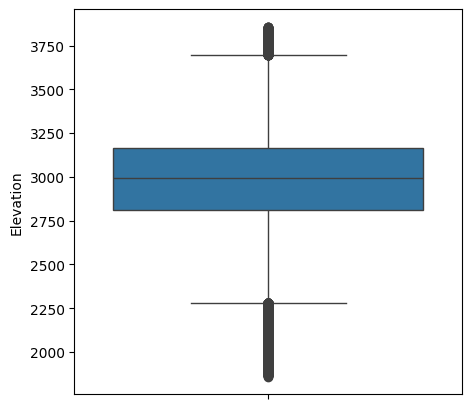

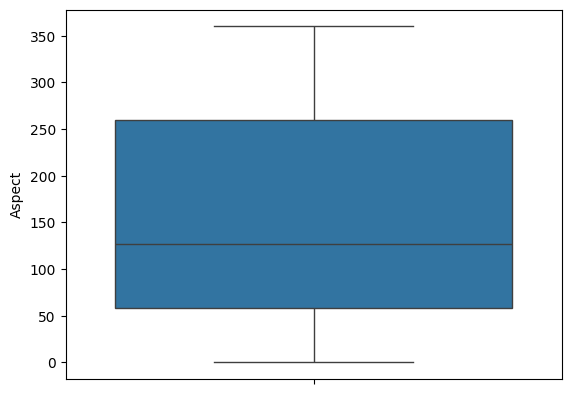

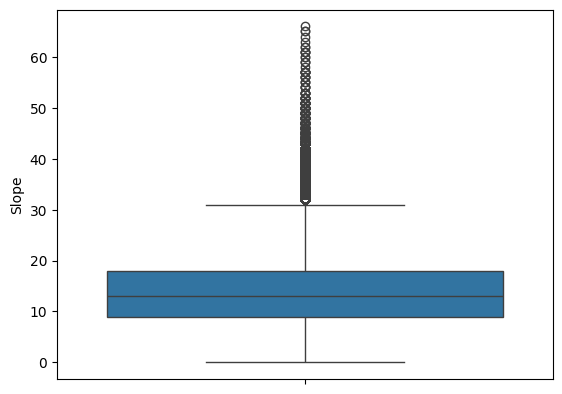

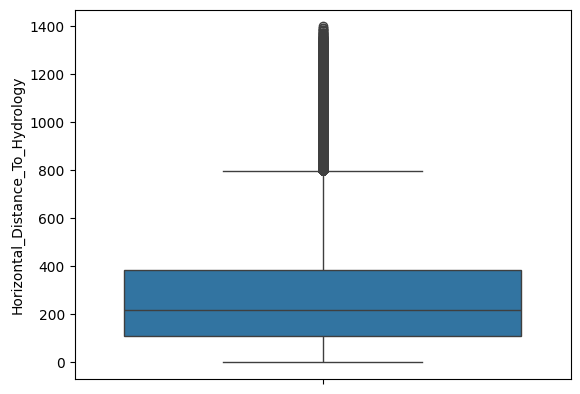

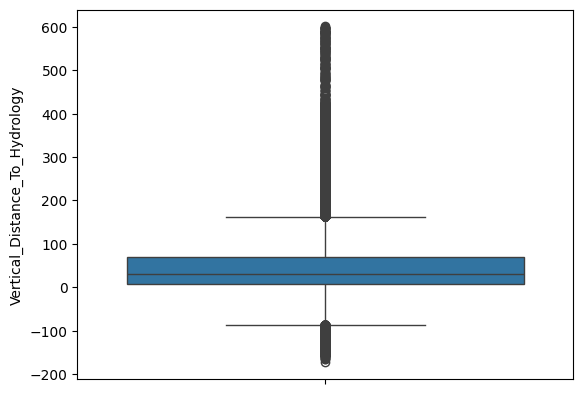

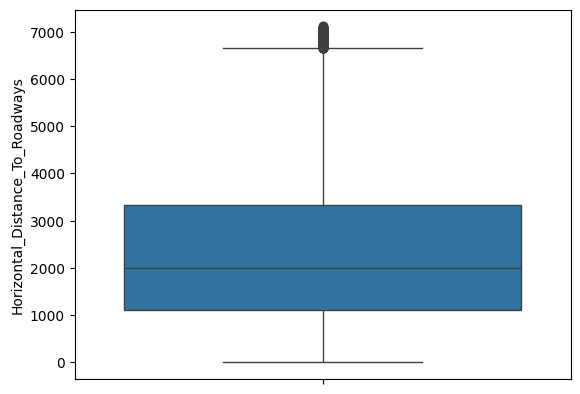

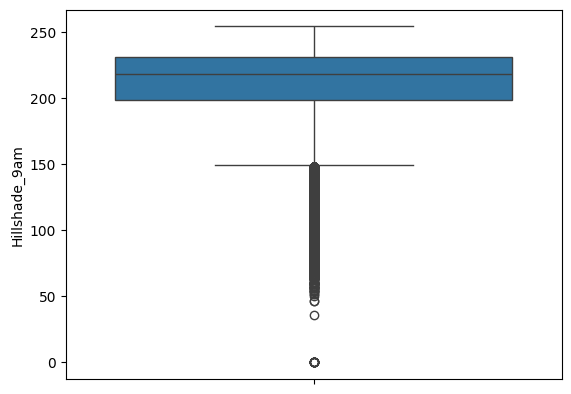

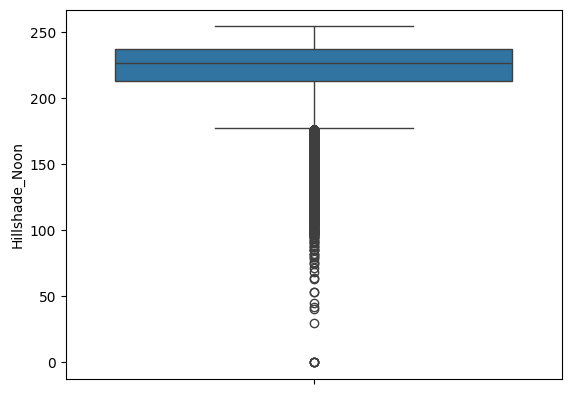

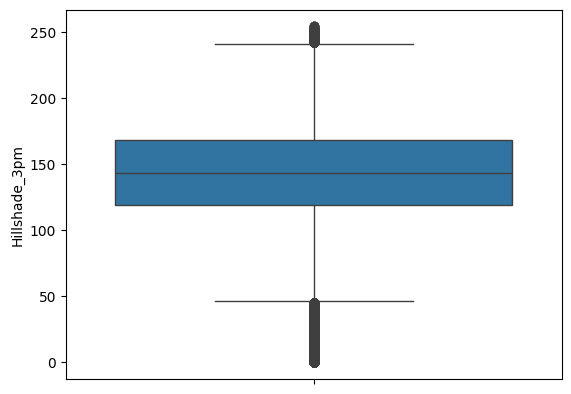

In [ ]:
# make boxplots for the first 10 columns
plt.figure(figsize = (5,5))
for i in range(9):
  sns.boxplot(data = X[X.columns[i]])
  plt.show()

Looking at the boxplots for the continuous variables, we believe that IQR is not a suitable measure for outliers. There are many data points that lie outside the 1.5IQR range. We will consider the outliers in our model.

EDA:

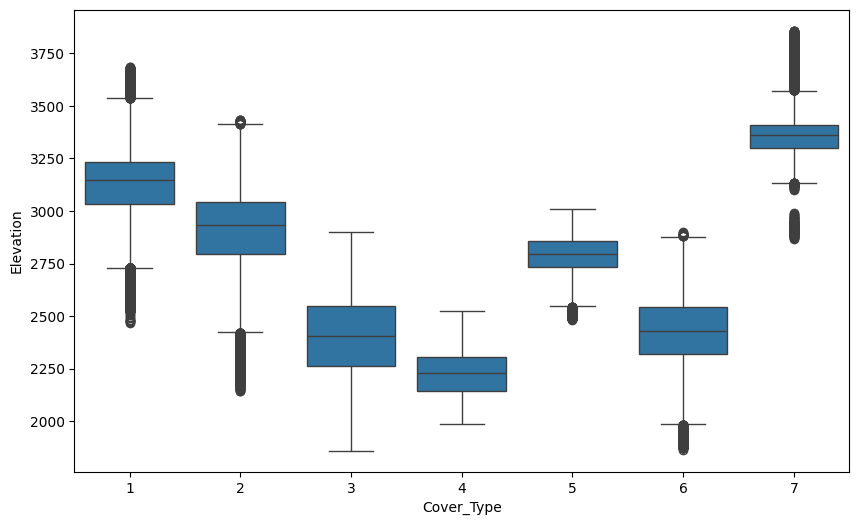

In [ ]:
# plot elevation against y categories
plt.figure(figsize=(10, 6))
# Combine X and y into a single DataFrame for plotting
sns.boxplot(x='Cover_Type', y='Elevation', data=df_combined)
plt.show()

Plotting Elevations against Cover Types, we can observe the range in elevations that are characteristic of different Cover Types. Something to note is that most ranges contain some form of overlap between multiple Cover Types.

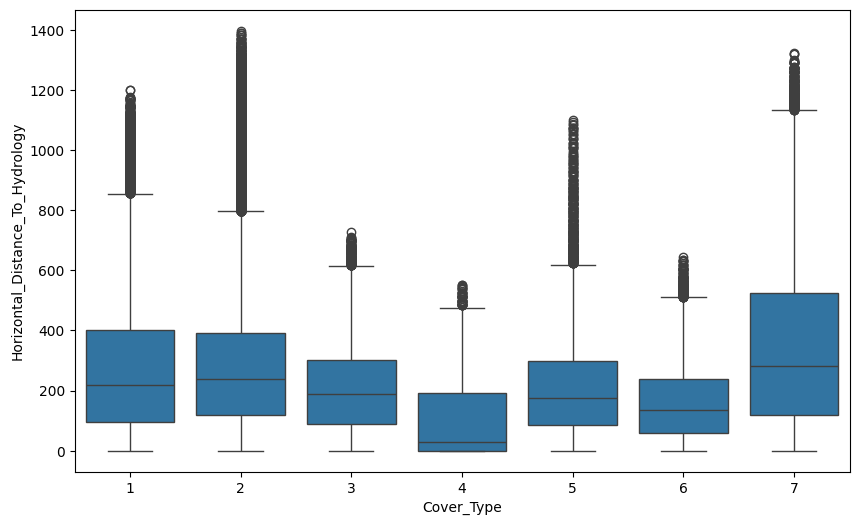

In [ ]:
# plotting horizontal distances to hydrology
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology', data=df_combined)
plt.show()

Based on this diagram, horizontal distance to hydrology is not helpful in distinguishing Cover Types.

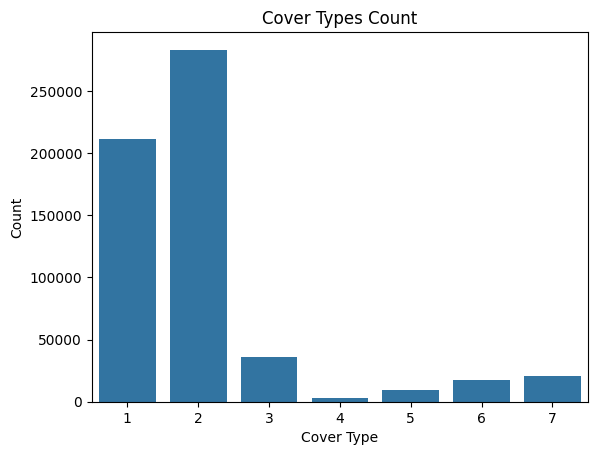

In [ ]:
sns.countplot(x='Cover_Type', data=y)
plt.title('Cover Types Count')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

The most common target is cover type 2, and the least common is cover type 4, which has much less than the rest of the outcomes.

/tmp/ipython-input-1439124274.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([X_rawah["Elevation"], X_neota["Elevation"], X_c_peak["Elevation"], X_poudre["Elevation"]], labels = ["Rawah", "Neota", "C. Peak", "Poudre"])


Text(0.5, 1.0, '')

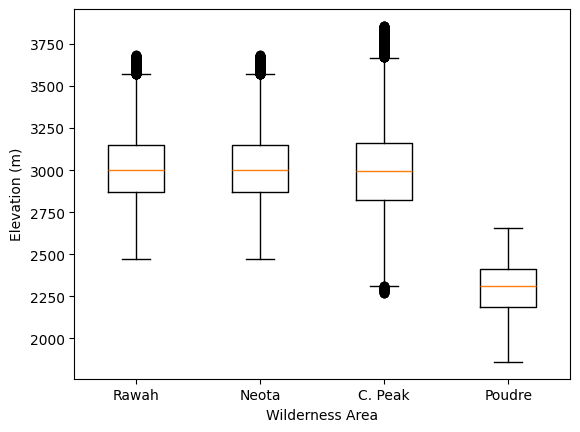

In [ ]:
# Plot 1: See elevant distribution of different wilderness areas
# Rawah: Area 1
# Neota: Area 2
# Comanche Peak: Area 3 (Abbr. as C. Peak)
# Cache la Poudre: Area 4 (Abbr as Poudre)

rawah_idx = X["Wilderness_Area1"] == 1
X_rawah = X[rawah_idx]
y_rawah = y[rawah_idx]

neota_idx = X["Wilderness_Area2"] == 1
X_neota = X[rawah_idx]
y_neota = y[rawah_idx]

c_peak_idx = X["Wilderness_Area3"] == 1
X_c_peak = X[c_peak_idx]
y_c_peak = y[c_peak_idx]

poudre_idx = X["Wilderness_Area4"] == 1
X_poudre = X[poudre_idx]
y_poudre = y[poudre_idx]


fig, ax = plt.subplots()
ax.boxplot([X_rawah["Elevation"], X_neota["Elevation"], X_c_peak["Elevation"], X_poudre["Elevation"]], labels = ["Rawah", "Neota", "C. Peak", "Poudre"])
ax.set_xlabel("Wilderness Area")
ax.set_ylabel("Elevation (m)")
ax.set_title("")

We note that most sites have about the same height, except for Poudre. Correlation for trees at Poudre with water distance?

Text(0.5, 1.0, 'Cache la Poudre')

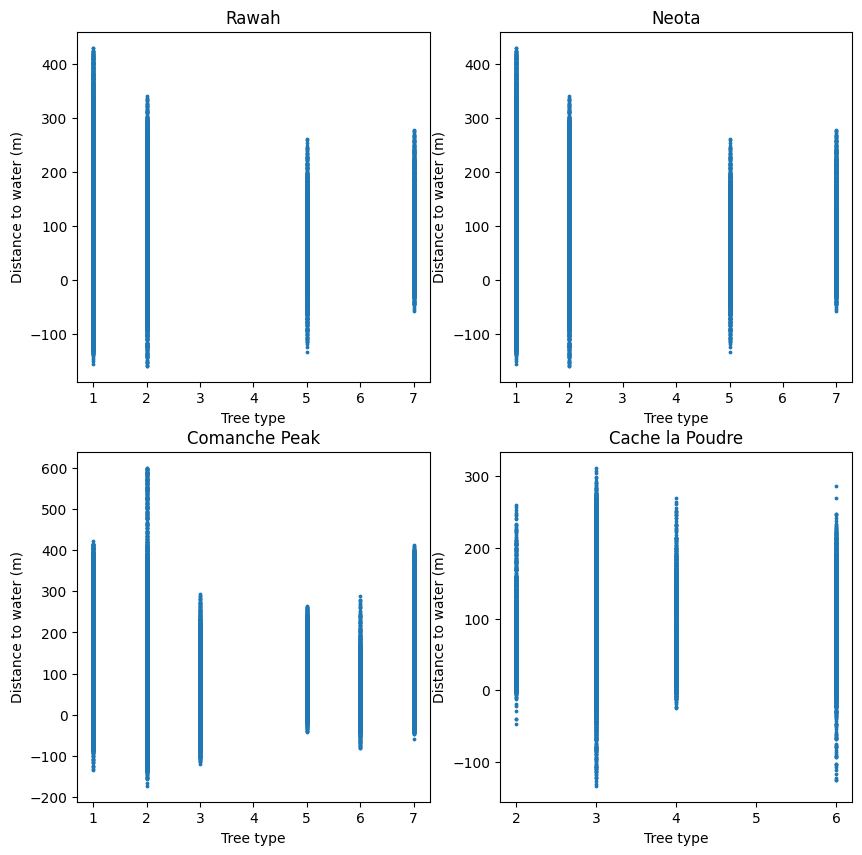

In [ ]:
# Plot 2: Plot the distribution to water for each plant type, per site

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

ax[0, 0].scatter(y_rawah, X_rawah["Vertical_Distance_To_Hydrology"], s = 3)
ax[0, 0].set_xlabel("Tree type")
ax[0, 0].set_ylabel("Distance to water (m)")
ax[0, 0].set_title("Rawah")
ax[0, 1].scatter(y_neota, X_neota["Vertical_Distance_To_Hydrology"], s = 3)
ax[0, 1].set_xlabel("Tree type")
ax[0, 1].set_ylabel("Distance to water (m)")
ax[0, 1].set_title("Neota")
ax[1, 0].scatter(y_c_peak, X_c_peak["Vertical_Distance_To_Hydrology"], s = 3)
ax[1, 0].set_xlabel("Tree type")
ax[1, 0].set_ylabel("Distance to water (m)")
ax[1, 0].set_title("Comanche Peak")
ax[1, 1].scatter(y_poudre, X_poudre["Vertical_Distance_To_Hydrology"], s = 3)
ax[1, 1].set_xlabel("Tree type")
ax[1, 1].set_ylabel("Distance to water (m)")
ax[1, 1].set_title("Cache la Poudre")

Trees 3 and 6 are unique to Comanche Peak, and tree 4 is unique to Cache la Poudre.

# Check-In 2
1. For the data set you have chosen choose any response variable that is numeric (and not discrete) to
model for regression. (This does not have to be directly related to the final goal of your project.)
2. Choose a single variable or variables to use as predictors. (You can try variable selection, but it is not
necessary.)
3. Model your regression and calculate the evaluation metrics on your training and validation data sets.
4. Answer in your notebook if you see evidence of overfitting or underfitting.
5. Use one regularization technique and evaluate its performance.
6. Include code and explanation for the steps above in your notebook.

In [ ]:
X.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4

In [ ]:
X.corr()["Horizontal_Distance_To_Hydrology"].sort_values()

,Horizontal_Distance_To_Hydrology
Soil_Type23,-0.132244
Wilderness_Area4,-0.100433
Wilderness_Area1,-0.097124
Soil_Type20,-0.078088
Soil_Type10,-0.071653
Soil_Type17,-0.071435
Soil_Type16,-0.067448
Soil_Type22,-0.051424
Soil_Type30,-0.049960
Soil_Type4,-0.049071


Our response variable will be Horizontal_Distance_To_Hydrology. We will be using Elevation and Vertical_Distance_To_Hydrology to predict the response variable because they have the highest correlation with our response variable.

Text(0, 0.5, 'Vertical_Distance_To_Hydrology (m)')

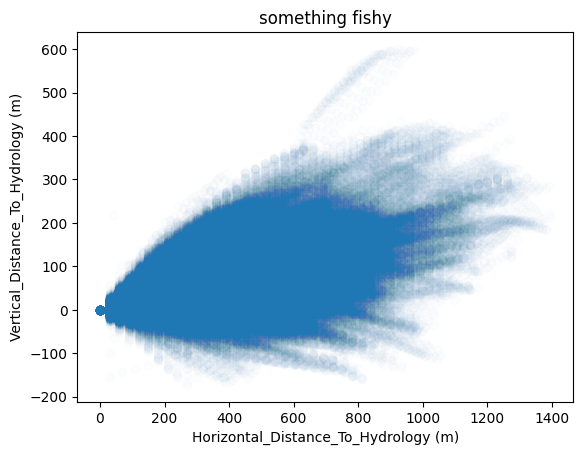

In [ ]:
plt.scatter(X["Horizontal_Distance_To_Hydrology"], X["Vertical_Distance_To_Hydrology"], alpha=0.01)
plt.title("something fishy")
plt.xlabel("Horizontal_Distance_To_Hydrology (m)")
plt.ylabel("Vertical_Distance_To_Hydrology (m)")

In [ ]:
# regression predictors and response
X_reg = X[["Elevation", "Vertical_Distance_To_Hydrology"]]
y_reg = X[["Horizontal_Distance_To_Hydrology"]]

# normalize values
X_reg = (X_reg - X_reg.min()) / (X_reg.max() - X_reg.min())
y_reg = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min())

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size = 0.2)

In [ ]:
print(X_train)

        Elevation  Vertical_Distance_To_Hydrology
98561    0.392696                        0.220930
171130   0.599300                        0.222222
458088   0.701851                        0.405685
380824   0.770885                        0.289406
348769   0.397199                        0.218346
...           ...                             ...
336144   0.676838                        0.266150
462557   0.751876                        0.330749
197828   0.614807                        0.248062
442645   0.647824                        0.277778
257855   0.218109                        0.312661

[464809 rows x 2 columns]


In [ ]:
# linear regression model training
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# train evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# test evaluation metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [ ]:
print(np.round(mse_train, 5), np.round(mse_test, 5))
print(np.round(mae_train, 5), np.round(mae_test, 5))
print(np.round(r2_train, 5), np.round(r2_test, 5))

0.01318 0.01322
0.08719 0.08715
0.42947 0.43407


Previous evaluation metrics with unnormalized data resulted in values that were rather hard to interpret. After normalization, we have a much better idea of how our model performs. The training and test metrics are roughly the same, which indicates that the model is not overfitting.

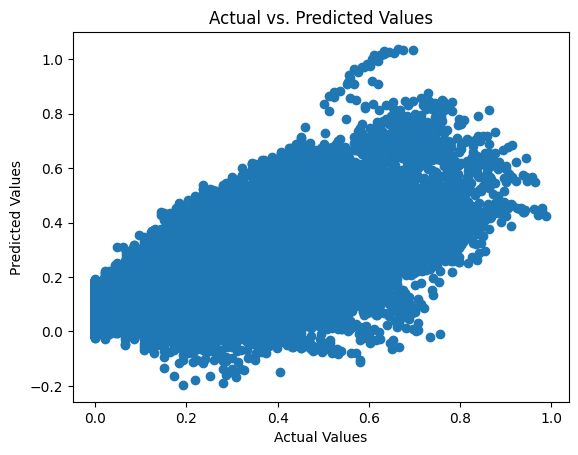

In [ ]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Cross Validation

In [ ]:
from sklearn.model_selection import KFold, LeaveOneOut, cross_validate, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

In [ ]:
# dummy data
X_dummy, y_dummy = make_regression(n_samples=10, n_features=2, noise=0.1)
print("Features (X):\n", X_dummy)
print("Target (y):\n", y_dummy)

Features (X):
 [[-0.84598257  0.10833062]
 [ 0.32954239 -1.36632066]
 [-0.39090139  0.35373681]
 [ 1.18501363 -0.94661475]
 [ 1.3146479  -0.89700373]
 [ 0.62519411  0.39090505]
 [-0.51634217 -0.51974024]
 [-0.18887661 -1.06937632]
 [ 0.10159728  0.93708821]
 [-0.94579769 -0.02169542]]
Target (y):
 [ -67.89175964 -104.90629678   -1.25957579   16.21763055   33.3329319
   96.71803573  -99.47516685 -123.65102223  102.37636802  -90.04784577]


In [ ]:
# K-Fold Cross Validation
print("\nK-Fold Cross Validation")
kf = KFold(n_splits=5)  # Splitting the data into 5 folds
for train_index, test_index in kf.split(X_dummy):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_dummy_train, X_dummy_test = X_dummy[train_index], X_dummy[test_index]
    y_dummy_train, y_dummy_test = y_dummy[train_index], y_dummy[test_index]

# Using cross_validate function for K-Fold
# lr = Lasso()
kf_results = cross_validate(model, X_dummy, y_dummy, cv=5, scoring='neg_mean_squared_error', return_estimator=True)
print("K-Fold Test Scores (MSE):", kf_results["test_score"])


K-Fold Cross Validation
TRAIN: [2 3 4 5 6 7 8 9] TEST: [0 1]
TRAIN: [0 1 4 5 6 7 8 9] TEST: [2 3]
TRAIN: [0 1 2 3 6 7 8 9] TEST: [4 5]
TRAIN: [0 1 2 3 4 5 8 9] TEST: [6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8 9]
K-Fold Test Scores (MSE): [-0.00192624 -0.00113021 -0.02076819 -0.00325225 -0.00337079]


In [ ]:
mse_scores = -kf_results["test_score"]
print("Adjusted MSE scores:", mse_scores)
print("Mean MSE:", mse_scores.mean())


Adjusted MSE scores: [0.00192624 0.00113021 0.02076819 0.00325225 0.00337079]
Mean MSE: 0.0060895367687966


The MSE of the model using the training dataset is 0.013. The MSE of the cross validation results average to 0.014. Since the MSE of the cross validation is generally the same as the MSE of the model, the model is generalizing well.

## Regularization technique

In [ ]:
# We will pick ridge regression as the regularization technique
from sklearn.linear_model import Ridge

alpha_list = [0, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  print("alpha: " + str(alpha))
  ridge_model = Ridge(alpha = alpha)

  ridge_model.fit(X_train, y_train)
  y_pred_train_ridge = ridge_model.predict(X_train)
  y_pred_test_ridge = ridge_model.predict(X_test)

  # train evaluation metrics
  mse_train = mean_squared_error(y_train, y_pred_train_ridge)
  mae_train = mean_absolute_error(y_train, y_pred_train_ridge)
  r2_train = r2_score(y_train, y_pred_train_ridge)

  # test evaluation metrics
  mse_test = mean_squared_error(y_test, y_pred_test_ridge)
  mae_test = mean_absolute_error(y_test, y_pred_test_ridge)
  r2_test = r2_score(y_test, y_pred_test_ridge)

  print(np.round(mse_train, 5), np.round(mse_test, 5))
  print(np.round(mae_train, 5), np.round(mae_test, 5))
  print(np.round(r2_train, 5), np.round(r2_test, 5))

alpha: 0
0.01318 0.01322
0.08719 0.08715
0.42947 0.43407
alpha: 0.01
0.01318 0.01322
0.08719 0.08715
0.42947 0.43407
alpha: 0.1
0.01318 0.01322
0.08719 0.08715
0.42947 0.43407
alpha: 1
0.01318 0.01322
0.08719 0.08715
0.42947 0.43407
alpha: 10
0.01318 0.01322
0.08721 0.08717
0.42946 0.43407
alpha: 100
0.01319 0.01323
0.08741 0.08737
0.42901 0.43367


For this regression problem, the ridge regression is almost identical to the ODS. alpha does not affect the final results too much.

# Check in week 4

We will make a classification model to predict if a certain observation from cartographic variables comes from wilderness area type Rawah (area 1) or Comanche Peak (area 3).

By subsetting the dataset to only include rows with wilderness area 1 and 3, We will use Wilderness_Area1 as the binary response variable. If Wilderness_Area1 is 1, the observation is from Rawah. If Wilderness_Area1 is 0, the observation is from Comanche Peak.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

In [ ]:
wilderness_area = X[["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4"]]
wilderness_area.sum()

,0
Wilderness_Area1,260796
Wilderness_Area2,29884
Wilderness_Area3,253364
Wilderness_Area4,36968


In [ ]:
mask = (X["Wilderness_Area1"] == 1) | (X["Wilderness_Area3"] == 1)
subset = X[mask]
subset = subset[["Elevation", "Aspect", "Slope",
                  "Horizontal_Distance_To_Hydrology",	"Vertical_Distance_To_Hydrology",
                  "Horizontal_Distance_To_Roadways",	"Hillshade_9am", "Hillshade_Noon",
                  "Hillshade_3pm",	"Horizontal_Distance_To_Fire_Points",
                  "Wilderness_Area1"]]
display(subset.head())

print(subset.shape)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1
0,2596,51,3,258,0,510,221,232,148,6279,1
1,2590,56,2,212,-6,390,220,235,151,6225,1
2,2804,139,9,268,65,3180,234,238,135,6121,1
3,2785,155,18,242,118,3090,238,238,122,6211,1
4,2595,45,2,153,-1,391,220,234,150,6172,1


(514160, 11)


In [ ]:
# correlation to pick predictors
subset.corr()["Wilderness_Area1"].sort_values()

,Wilderness_Area1
Slope,-0.210529
Vertical_Distance_To_Hydrology,-0.184432
Aspect,-0.122357
Horizontal_Distance_To_Hydrology,-0.121624
Hillshade_3pm,-0.119540
Hillshade_Noon,-0.012269
Elevation,0.044681
Hillshade_9am,0.181227
Horizontal_Distance_To_Fire_Points,0.368856
Horizontal_Distance_To_Roadways,0.387442


The variables with the highest magnitude correlation with Wilderness_Area1 are Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Fire_Points, and Horizontal_Distance_To_Roadways. We will use these as predictors.

In [ ]:
# prepare logistic regression predictors and response
X_log = subset[["Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Horizontal_Distance_To_Roadways"]]
y_log = subset[["Wilderness_Area1"]]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size = 0.2)

In [ ]:
# model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7208845495565582


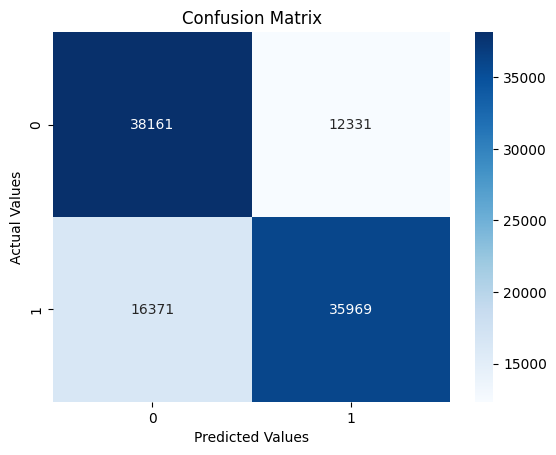

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

The Prediction Accuracy for our model is 0.7218472848918625.

The Prediction Error is 0.27815271510813755.

The true positive rate (recall) is 35774/(35774+16413) = 0.685496387989346.

The Precision of the model is 35774/(35774 + 12190) = 0.7458510549578851.


A confusion matrix summarizes the performance of a classification model on a test set. From the above, we can see that the model correctly predicted the true positive class "wilderness area1 = 1" 35774 times and correctly guessed the true negative class "wilderness area1 = 0" 38455 times and false negative 16413 and false positive 12190. The above percentages are the accuracies.


ROC curve:

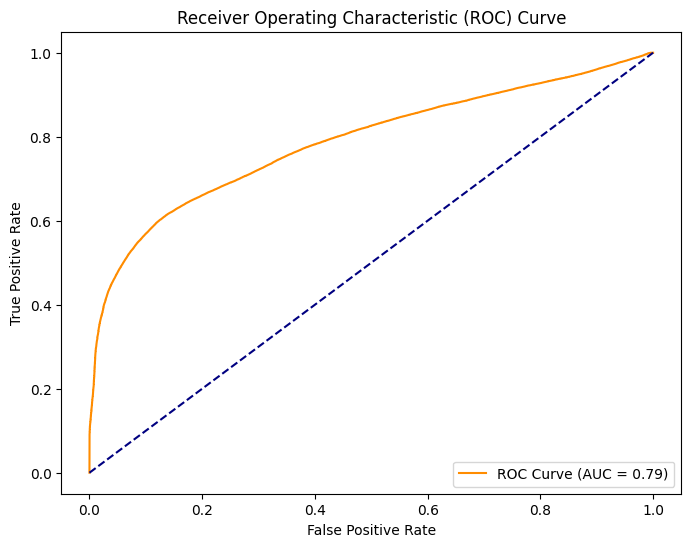

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The AUC value for this model is 0.79.

Our ROC curve is good because it curves steeply upwards and then to the right and the AUC which is 0.79 explains the performance of our classification model. As it is closer to 1 than it is 5, we can say that our model can properly distinguish between positive and negative classes.

5-fold cross-validation:

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

# 5-fold cross-validation on the test set
cv_results = cross_validate(model, X_test, y_test, cv=5,
                            scoring=['accuracy', 'roc_auc'])

print("Cross-validation results (Accuracy):", cv_results['test_accuracy'])
print("Cross-validation results (AUC):", cv_results['test_roc_auc'])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validation results (Accuracy): [0.7253367  0.72071765 0.71788389 0.72182243 0.71856462]
Cross-validation results (AUC): [0.79372301 0.79022766 0.78449146 0.78677941 0.78415618]


In [ ]:
print(cv_results['test_accuracy'])
print(cv_results['test_roc_auc'])

[0.7253367  0.72071765 0.71788389 0.72182243 0.71856462]
[0.79372301 0.79022766 0.78449146 0.78677941 0.78415618]


On the top is the test accuracy which are all relatively close to each other with a range of around 0.01 which is consistent which means our model is not dependent on our training or testing set and we are not overfitting.

The bottom is the AUC which is also consistent with a range of 0.007 and close to 1 which indicates that our model is able to distinguish between the two wilderness areas properly.

In [ ]:
subset[subset.Wilderness_Area1 == 1].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1
count,260796.000000,260796.000000,260796.000000,260796.000000,260796.000000,260796.000000,260796.000000,260796.000000,260796.000000,260796.000000,260796.0
mean,3000.267286,138.280273,12.157292,246.553333,34.745744,3134.408055,218.117199,223.948017,137.644385,2538.703600,1.0
std,200.271001,106.232453,6.708537,188.301562,47.114353,1743.157038,22.018575,16.986753,33.939194,1538.413717,0.0
min,2473.000000,0.000000,0.000000,0.000000,-159.000000,0.000000,56.000000,74.000000,0.000000,0.000000,1.0
25%,2870.000000,56.000000,7.000000,95.000000,4.000000,1572.000000,208.000000,215.000000,118.000000,1426.000000,1.0
50%,3002.000000,103.000000,11.000000,210.000000,22.000000,3155.000000,223.000000,226.000000,138.000000,2230.000000,1.0
75%,3151.000000,210.000000,16.000000,360.000000,51.000000,4589.000000,233.000000,235.000000,158.000000,3260.000000,1.0
max,3686.000000,360.000000,61.000000,1124.000000,431.000000,7117.000000,254.000000,254.000000,251.000000,7173.000000,1.0


In [ ]:
subset[subset.Wilderness_Area1 == 0].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1
count,253364.000000,253364.000000,253364.000000,253364.000000,253364.000000,253364.000000,253364.000000,253364.000000,253364.000000,253364.000000,253364.0
mean,2980.554471,165.189549,15.173786,298.923272,56.153171,1937.118438,209.084606,224.412320,146.478482,1562.401351,0.0
std,239.272648,112.023982,7.293288,236.972143,65.699674,994.475116,26.825679,20.718219,39.305238,796.189731,0.0
min,2270.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2820.000000,59.000000,10.000000,120.000000,10.000000,1180.000000,194.000000,212.000000,121.000000,942.000000,0.0
50%,2997.000000,158.000000,14.000000,242.000000,38.000000,1831.000000,213.000000,227.000000,147.000000,1475.000000,0.0
75%,3160.000000,266.000000,19.000000,426.000000,83.000000,2610.000000,229.000000,241.000000,175.000000,2123.000000,0.0
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,5463.000000,254.000000,254.000000,254.000000,4589.000000,0.0


We stayed with the default threshold of 0.5 in a logistic regression model, since the number of observations belonging to Wilderness_Area_1 is approximately similar to Wilderness_Area_3 and also sets an equal decision boundary where both Wilderness Areas are equally probable. If we were to adjust the threshold solely due to Wilderness_Area_1 having a slightly higher frequency in this dataset, we believe this would imply that Area 1 should be predicted more often when this may not be representative of the true population-level probabilities.

#Check in week 5/6

In [ ]:
subset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1
0,2596,51,3,258,0,510,221,232,148,6279,1
1,2590,56,2,212,-6,390,220,235,151,6225,1
2,2804,139,9,268,65,3180,234,238,135,6121,1
3,2785,155,18,242,118,3090,238,238,122,6211,1
4,2595,45,2,153,-1,391,220,234,150,6172,1


In [ ]:
# prepare Random Forest predictors and response
X_rf = subset[["Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Horizontal_Distance_To_Roadways"]]
y_rf = subset[["Wilderness_Area1"]]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size = 0.2)

In [ ]:
# Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# predictions
y_probs_train = model.predict_proba(X_train)[:, 1]
y_preds_train = (y_probs_train >= 0.5).astype(int)

y_probs_test = model.predict_proba(X_test)[:, 1]
y_preds_test = (y_probs_test >= 0.5).astype(int)

# calculate accuracy
train_acc = accuracy_score(y_train, y_preds_train)
print("Training Accuracy:", train_acc)

test_acc = accuracy_score(y_test, y_preds_test)
print("Testing Accuracy:", test_acc)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy: 0.999817663762253
Testing Accuracy: 0.8122860588143769


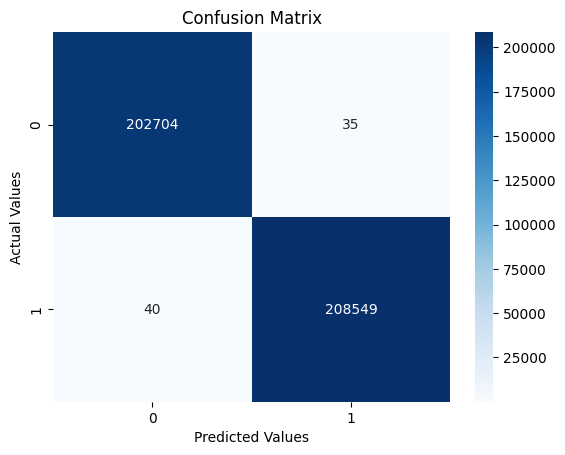

Prediction Accuracy: 0.999817663762253
Prediction Error: 0.00018233623774699392
True Positive Rate: 0.9998082353335986
F1 Score: 0.9998202184705146


In [ ]:
# confusion matrix, prediction accuracy, prediction error, true positive rate, true negative rate, F1 score of training set

# confusion matrix
cm = confusion_matrix(y_train, y_preds_train)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

# prediction accuracy
acc = accuracy_score(y_train, y_preds_train)
print("Prediction Accuracy:", acc)

# prediction error
error = 1 - acc
print("Prediction Error:", error)

# true positive rate
tpr = cm[1, 1] / (cm[1, 1] + cm[1, 0])
print("True Positive Rate:", tpr)

# F1 score
f1 = f1_score(y_train, y_preds_train)
print("F1 Score:", f1)

The model has good diagnostics. The confusion matrix shows that there are very few errors, and the accuracy, true positive rate, and F1 score are all very high (close to 1).

AUC: 0.9022010540661144


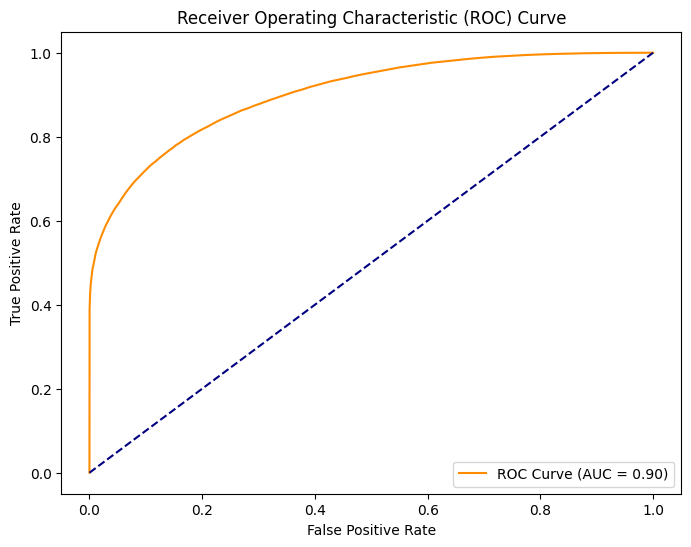

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score

# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
roc_auc = roc_auc_score(y_test, y_probs_test)

print("AUC:", roc_auc)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


explanation

our roc curve does have a high accuracy alongside with our confusion matrix but that is mainly because the tree dataset itself is designed to be overfitted. The testing accuracy and the cross-validation results do end up being around 0.80 which is much more accurate for our random forest model on unseen data because our feature selection using vertical distance to hydrology, and horizontal distance to fires/roadways. We still have a 0.80 testing accuracy though which means our model performs well for new test data.

In [ ]:
# 5-fold cross-validation on the test set
cv_results = cross_validate(model, X_test, y_test, cv=5,
                            scoring=['accuracy', 'roc_auc'])

print("Cross-validation results (Accuracy):", cv_results['test_accuracy'])
print("Cross-validation results (AUC):", cv_results['test_roc_auc'])

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-validation results (Accuracy): [0.79715078 0.79452521 0.79976661 0.7952932  0.80035009]
Cross-validation results (AUC): [0.88557313 0.8836579  0.89065172 0.88491593 0.88931006]


# Check in week 7

We will perform PCA on the dataset.

### Implementing PCA on our tree dataset.

Given our tree dataset has 581,012 rows and 54 features with a target as a cover_type, the dataset is large enough to perform some form of dimensionality reduction and PCA.

The first 10 features are
1. Elevation (meters)
2. Aspect (0–360 degrees; orientation of slope)
3. Slope (0–60 degrees)
4. Horizontal_Distance_To_Hydrology (meters)
5. Vertical_Distance_To_Hydrology (meters)
6. Horizontal_Distance_To_Roadways (meters)
7. Hillshade_9am (0–255; indirect measure of illumination)
8. Hillshade_Noon (0–255)
9. Hillshade_3pm (0–255)
10. Horizontal_Distance_To_Fire_Points (meters)

Since forest covers depend on these 10 features, we could figure out which of these features are the most important with how PCA.

We also have some one hot encoding of four different wilderness areas.

For soil, we have 40 different binary features and these could affect tree species which will then affect cover_type.

With the above variables, we perform PCA to predict the dominant tree species from the original 54 features to 10 PCs to explain the variance.

What we will test:
1. PCA before vs. after scaling
2. PCA on continuous subset vs. full dataset
3. PCA-based clustering (kMeans, GMM) to visualize geography

In [ ]:
# only use numerical columns
X_nums = X[X.columns[:10]]

In [ ]:
# mean of each feature
mean_vector = np.mean(X_nums, axis=0)

# center the data
X_centered = X_nums - mean_vector

# covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sort eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# project onto principal components
Y = X_centered.dot(eigenvectors)

In [ ]:
# variance
explained_var = eigenvalues / eigenvalues.sum()
cumulative_var = np.cumsum(explained_var)
cumulative_var

array([0.66245305, 0.96979011, 0.98750578, 0.99609974, 0.99916751,
       0.99964069, 0.9998877 , 0.99999147, 0.99999947, 1.        ])

### explanation

If you apply PCA to your data, include code, cumulative variability explained, and scree plot. Explain
how you are using PCA in your project for dimensionality reduction or to learn structure in the data.

In our cumulative variance, we can see that by using two principal components, we already have 97% variance which captures a large proportion of our data and any further just captures extra noise.

This means that PC1 and PC2 together retain almost all the essential information and variability of our dataset and can represent an accurate summary of the entire dataset together such as relations, clusters, and patterns.

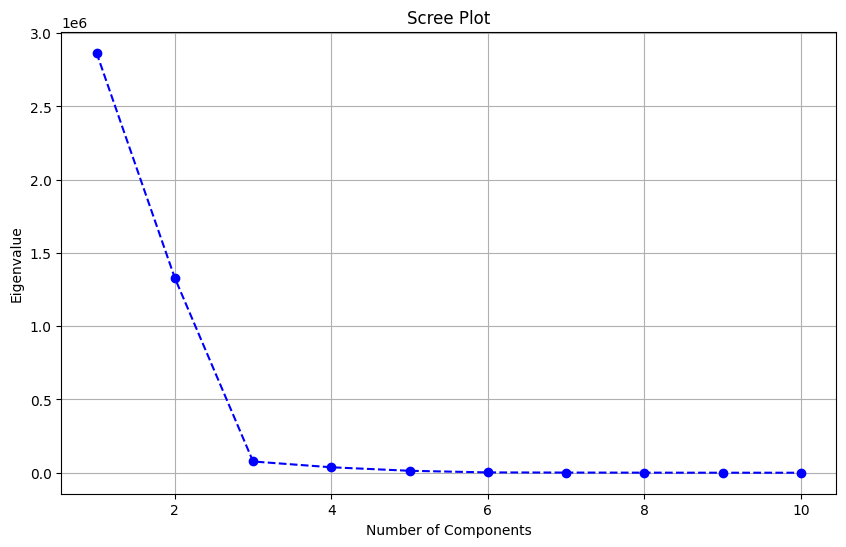

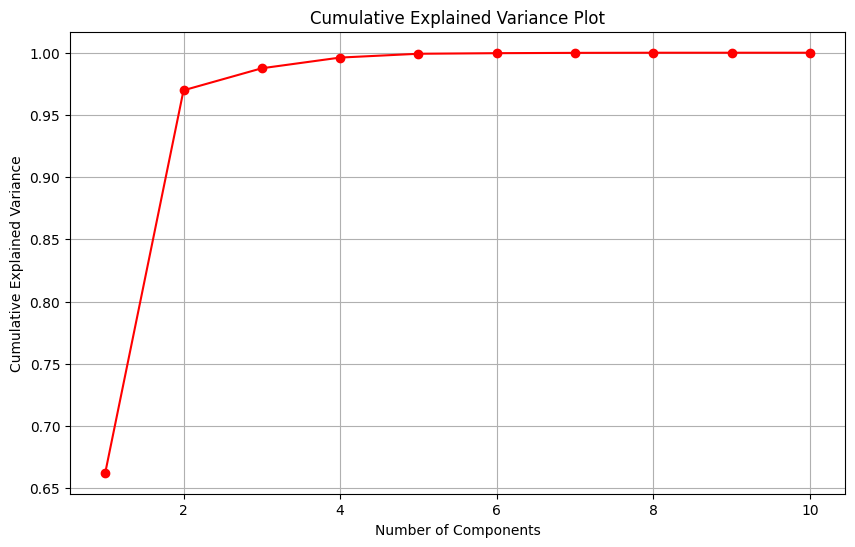

In [ ]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

### Applying Clustering on PCA Reduced Data

We will now apply K-Means clustering to the principal components obtained from the scaled data. This can help identify natural groupings within the dataset based on the most significant variance captured by PCA. We will then visualize these clusters.

In [ ]:
from sklearn.cluster import KMeans

# Let's choose 7 clusters, as there are 7 cover types in the target variable
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)

# Fit K-Means on the principal components obtained from scaled data
clusters = kmeans.fit_predict(X_pca_df[['PC1', 'PC2']]) # Using first two PCs for simplicity in visualization

# Add cluster labels to the PCA DataFrame
X_pca_df['Cluster'] = clusters


Now we scale the numerical features (`X_nums`) using `StandardScaler`, apply PCA to the scaled data, and then visualize and compare the PCA results from both the unscaled and scaled data to highlight the differences.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
X_scaled = scaler.fit_transform(X_nums)

# Convert the scaled array back to a DataFrame for easier handling, preserving column names
X_scaled = pd.DataFrame(X_scaled, columns=X_nums.columns)
display(X_scaled.head())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479


In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
X_scaled = scaler.fit_transform(X_nums)

# Convert the scaled array back to a DataFrame for easier handling, preserving column names
X_scaled = pd.DataFrame(X_scaled, columns=X_nums.columns)

# Instantiate PCA with all components for initial analysis
pca = PCA(n_components=X_scaled.shape[1])

# Fit PCA to the scaled data
pca.fit(X_scaled)

# Transform the scaled data to get the principal components
X_pca = pca.transform(X_scaled)

# Create a DataFrame for the principal components
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Display the first few rows of the PCA DataFrame
display(X_pca_df.head())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.688812,-1.501490,-1.049702,0.505186,3.447792,-1.124809,-0.634077,0.030967,-0.061424,-0.054913
1,-0.574612,-1.569387,-1.326725,0.415917,3.447151,-1.157601,-0.638353,-0.040575,0.014848,-0.093419
2,-0.302817,-1.918021,0.217198,1.265747,2.466291,-0.169113,0.729364,-0.318155,0.223363,-0.002407
3,-0.556475,-1.098527,0.873560,1.564260,2.475231,-0.043035,1.561743,-1.019514,0.232626,0.007886
4,-0.675404,-1.531095,-1.434590,0.456953,3.373742,-1.126335,-0.667136,-0.216374,0.205080,-0.093223


Visualizing and comparing PCA results


In [ ]:
explained_var_scaled = pca.explained_variance_ratio_
cumulative_var_scaled = np.cumsum(explained_var_scaled)
print("Cumulative Explained Variance for Scaled Data:")
print(cumulative_var_scaled)

Cumulative Explained Variance for Scaled Data:
[0.25861187 0.47358739 0.64751017 0.75526375 0.832293   0.88695775
 0.93338313 0.96901457 0.99965976 1.        ]


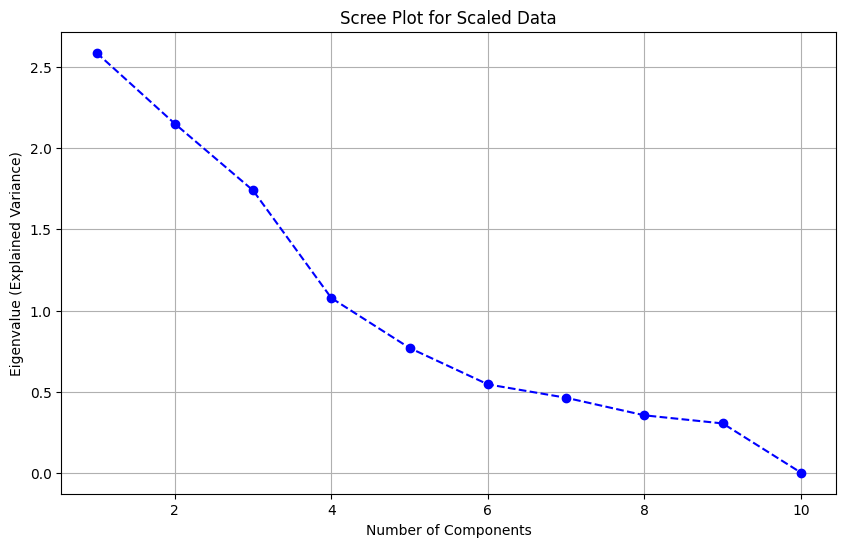

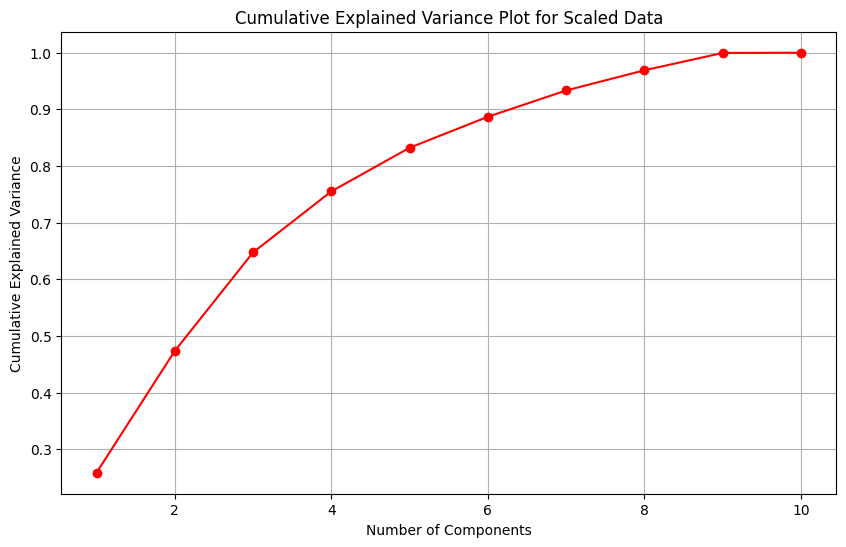

In [ ]:
# Scree Plot for Scaled Data
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.title('Scree Plot for Scaled Data')
plt.grid(True)
plt.show()

# Cumulative Explained Variance Plot for Scaled Data
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var_scaled) + 1), cumulative_var_scaled, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot for Scaled Data')
plt.grid(True)
plt.show()

### Visualizing Clusters on PCA Components

Let's visualize the clusters identified by K-Means on the first two principal components.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


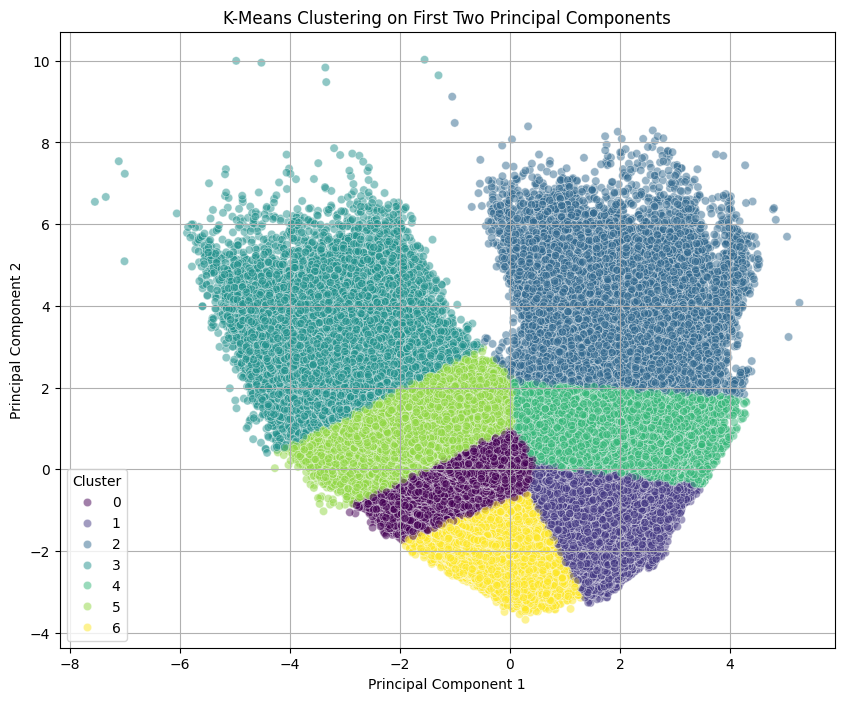

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='viridis',
    data=X_pca_df,
    legend='full',
    alpha=0.5
)
plt.title('K-Means Clustering on First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


## Summary:

1. For our data scaling, the numerical features X_nums were successfully scaled using StandardScaler, resulting in X_scaled having values centered around zero with unit variance.
2. For our PCA on the scaled data, we applied the PCA and the resulting principal components were stored and plotted.

To explain the results, after we scaled the data, we approximately need 8 principal components to explain 97% of the total variance in comparison to the two principal components from the previous attempt we did. This means the eigenvalues in the scree plot for scaled data dropped off more gardually, indicting that there was an even distribution of variance across the components we stated at the start.

On the unscaled data, the two principal components were capable of explaining 97% of the total variacne, larger due to the fact that features with larger scales dominated the variance such as elevation or horizontal_distance_to_roadways which would be in the thousands, which is much greater than the other values.

After scaling, we can see that the variance is actually distributed much more evenly, meaning that every feature category has a balanced contribution to the results.

## Clustering

1. Scaling data before PCA is crucial to prevent features with larger magnitudes from disproportionately influencing the principal components, leading to a more robust and balanced representation of the underlying data structure.

After applying k-means to the PCA-transformed data, the resulting clusters formed distinct wedge shaped regions in the two dimensional principal component space. This indicates that the dataset was partitioned based on Euclidean proximity to centroids rather than separating naturally occurring groups.

K-means can be useful for exploratory segmentation, but it did not correspond directly to cover types in this dataset. Evaluating cluster composition (e.g., via cross-tabulation with the cover labels) or applying nonlinear clustering methods could provide us deeper insight into the structure of the data.

# Check-in Week 8/9/10

Here we will use a neural network for multiclass classification. The response variable here is the forest cover type

For this dataset, we will use a normal deep neural network



In [ ]:
import torch
import torch.nn as nn

# Check for GPU availability and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Extremely simple model architecture
model = nn.Sequential()

# Input layer
model.add_module("Input", nn.Linear(in_features = X.shape[1], out_features = 1024))

# Hidden layers
model.add_module("Hidden Layer 1", nn.Linear(in_features=1024, out_features=1024))
model.add_module("Activation 1", nn.Sigmoid())
model.add_module("Hidden Layer 2", nn.Linear(in_features=1024, out_features=1024))
model.add_module("Activation 2", nn.Sigmoid())

# Output layer
model.add_module("Output", nn.Linear(in_features=1024, out_features = len(np.unique(y))))

# Move model to GPU if available
model = model.to(device)


In [ ]:
batch_size = 100
from torch.utils.data import DataLoader, TensorDataset

# Shift the y labels to start from 0 (if this doesn't happen, PyTorch can't train)
y = y - 1

# Convert Trees Pandas DataFrame to Torch Tensors
X_tensor = torch.tensor(X.to_numpy(), dtype=torch.float32)
y_tensor = torch.tensor(y.to_numpy().flatten(), dtype=torch.long)

# Split dataset into training, validation and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# Convert to DataLoader for batching
train_dl = DataLoader(train_dataset, batch_size =batch_size, shuffle=True)
val_dl = DataLoader(val_dataset, batch_size = batch_size, shuffle=False)
test_dl = DataLoader(test_dataset, batch_size = batch_size, shuffle=False)

In [ ]:
num_epochs = 30

# We will use the cross entropy loss function for multiclass
loss_function = nn.CrossEntropyLoss()\

# Stochastic gradient descent with momentum as optimizer with lr and momentum from hyperparameter tuning
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Our training function (just the same thing from the MNIST notebook)
def train(model, num_epochs, train_dl, valid_dl, device, loss_function, optimizer):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs

    # Form
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            # Move batches to GPU if available
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            pred = model(x_batch)
            loss = loss_function(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                # Move batches to GPU if available
                x_batch = x_batch.to(device)
                y_batch = y_batch.to(device)
                pred = model(x_batch)
                loss = loss_function(pred, y_batch)
                loss_hist_valid[epoch] += loss.item() * y_batch.size(0)
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum().cpu()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

torch.manual_seed(1)
hist_train_validation = train(model, num_epochs, train_dl, val_dl, device, loss_function, optimizer)

For our neural network training, we used crossentropyloss as the standard loss function as it combines logsoftmax to convert our logits into probabilities and measures how well the predicted probabilities match the true class labels.

Since we have 7 forest cover types, using CrossEntropyLoss penalizes confident wrong predictions more heavily than uncertain ones and we can see that the loss decreases as the epochs increase.

For our accuracy, we need it to detect overfitting by tracking it separately on our training and validation sets.

For our learning rate, we decided with learning rate of 0.01 being the best with fast convergence, stable training epochs, and a solid final validation accuracy.



For our hyperparameter tuning, we chose SGD from class with momentum to get convergence and was a solid choice for neural network training. For our batch size, we chose 100 as we wanted to have faster updates with generalization and 30 epochs to see model behavior after convergence which typically happens around 20 epochs without overfitting.

To complete everything, we split it into a training of 70, validation of 15, and test of 15 using PyTorch's default initialization. Our forward pass computes the predictions and CrossEntropyLoss calculates the loss and our backward pass computing the gradient with SGD as our optimization.